# 1.0 Preparation
---

In [216]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json

from pandas import json_normalize

In [217]:
# vacancy_all_json downloaded from official hong kong government database
# https://data.gov.hk/en-data/dataset/hk-td-tis_5-real-time-parking-vacancy-data/resource/14572596-0bb2-4cfc-8935-93c8a1c9bb3a
# data from 2021/03/09 09:00:00 to 2021/06/17 23:45:00

!git clone https://github.com/khchoi0/DTT_BootCamp2021_MiniProject.git

fatal: destination path 'DTT_BootCamp2021_MiniProject' already exists and is not an empty directory.


In [218]:
# car parks basic info url

url_basic = 'https://resource.data.one.gov.hk/td/carpark/basic_info_all.json'

In [219]:
# grab json of url_basic

json_basic = json.loads(requests.get(url_basic).content)

In [220]:
# inspect type of normalized json_basic

type(json_normalize(json_basic).car_park[0])

list

In [221]:
# save normalized json (type: list)

list_basic = json_normalize(json_basic).car_park[0]
len(list_basic)

340

In [222]:
# type cast list_basic to dataframe

df_basic = pd.DataFrame(list_basic)
type(df_basic), len(df_basic)

(pandas.core.frame.DataFrame, 340)

In [223]:
# inspect info of df_basic

df_basic.info()
# 12 car parks do not have data for district

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   park_id            340 non-null    object 
 1   name_en            340 non-null    object 
 2   name_tc            340 non-null    object 
 3   name_sc            340 non-null    object 
 4   displayAddress_en  340 non-null    object 
 5   displayAddress_tc  340 non-null    object 
 6   displayAddress_sc  340 non-null    object 
 7   latitude           340 non-null    float64
 8   longitude          340 non-null    float64
 9   district_en        328 non-null    object 
 10  district_tc        328 non-null    object 
 11  district_sc        328 non-null    object 
 12  contactNo          336 non-null    object 
 13  opening_status     336 non-null    object 
 14  height             340 non-null    float64
 15  remark_en          340 non-null    object 
 16  remark_tc          340 non

In [224]:
df_basic.columns

Index(['park_id', 'name_en', 'name_tc', 'name_sc', 'displayAddress_en',
       'displayAddress_tc', 'displayAddress_sc', 'latitude', 'longitude',
       'district_en', 'district_tc', 'district_sc', 'contactNo',
       'opening_status', 'height', 'remark_en', 'remark_tc', 'remark_sc',
       'website_en', 'website_tc', 'website_sc', 'carpark_photo'],
      dtype='object')

In [225]:
# save cleaned dataframe (dropped unnecessary columns)

df_basic_cleaned = df_basic.drop([
    'latitude', 'longitude', 'contactNo', 'opening_status', 
    'height', 'remark_en', 'remark_tc', 'remark_sc', 
    'website_en', 'website_tc', 'website_sc', 'carpark_photo'
], axis='columns')
df_basic_cleaned.head()

,park_id,name_en,name_tc,name_sc,displayAddress_en,displayAddress_tc,displayAddress_sc,district_en,district_tc,district_sc
0,tdc1p1,Lee Garden One Car Park,利園一期停車場,利园一期停车场,"33 HYSAN AVENUE, Wan Chai District, Hong Kong",香港 灣仔區 希慎道33號,香港 湾仔区 希慎道33号,Wan Chai,灣仔區,湾仔区
1,tdc1p3,Leighton Car Park,禮頓中心停車場,礼顿中心停车场,"77 LEIGHTON ROAD, Wan Chai District, Hong Kong",香港 灣仔區 禮頓道77號,香港 湾仔区 礼顿道77号,Wan Chai,灣仔區,湾仔区
2,tdc1p2,Lee Garden Two Car Park,利園二期停車場,利园二期停车场,"28 YUN PING ROAD, Wan Chai District, Hong Kong",香港 灣仔區 恩平道28號,香港 湾仔区 恩平道28号,Wan Chai,灣仔區,湾仔区
3,tdc2p1,Car Park 1 (Hourly),一號停車埸(時租),一号停车埸(时租),"CHEONG SHUN ROAD, Islands District, New Terri...",新界 離島區 暢順路號,新界 离岛区 畅顺路号,Islands,離島區,离岛区
4,tdc2p4,Car Park 4 - Indoor Zone (Hourly),四號停車埸-室內區(時租),四号停车埸-室内区(时租),"11 CHEONG TAT ROAD, Islands District, New Terr...",新界 離島區 暢達路11號,新界 离岛区 畅达路11号,Islands,離島區,离岛区


In [226]:
# construct complete park_id list

list_park_id_full = list(df_basic['park_id'])
len(list_park_id_full)

340

In [227]:
# save have-null dataframe (only data with null values)
# inspect the address for have-null dataframe

df_basic_cleaned_null = df_basic_cleaned[df_basic_cleaned['district_en'].isnull()]
df_basic_cleaned_null

,park_id,name_en,name_tc,name_sc,displayAddress_en,displayAddress_tc,displayAddress_sc,district_en,district_tc,district_sc
180,tdc44p1,Kowloon Park,九龍公園,九龙公园,"22, Austin Road, Tsim Sha Tsui, Kowloon",九龍尖沙咀柯士甸道22號,九龙尖沙咀柯士甸道22号,None,None,None
188,tdc44p3,Waterfall Bay Park,瀑布灣公園,瀑布湾公园,"Waterfall Bay Road, Wah Fu Estate, Aberdeen, H...",香港仔華富邨瀑布灣道,香港仔华富邨瀑布湾道,None,None,None
191,tdc44p2,Aberdeen Tennis and Squash Centre,香港仔網球及壁球中心,香港仔网球及壁球中心,"No. 1 Aberdeen Praya Road, Aberdeen, Hong Kong",香港仔海傍道1號,香港仔海傍道1号,None,None,None
203,tdc48p3,Sham Shui Po Sports Ground,深水埗運動場,深水埗运动场,"3 Hing Wah Street, Cheung Sha Wan, Kowloon",九龍長沙灣興華街3號,九龙长沙湾兴华街3号,None,None,None
209,tdc10p2,Shatin Government Offices,沙田政府合署,沙田政府合署,"Sha Tin Government Offices, 1 Sheung Wo Che Ro...",新界沙田上禾輋路1號沙田政府合署,新界沙田上禾輋路1号沙田政府合署,None,None,None
213,tdc60p1,Che Kung Temple Sports Centre,車公廟體育館,车公庙体育馆,10 SHA TIN TAU ROAD,沙田頭路10號,沙田头路10号,None,None,None
281,tdstt34,HEI TUNG STREET,喜東街,喜东街,HEI TUNG STREET TUNG CHUNG LANTAU ISLAND,東涌喜東街,东涌喜东街,None,None,None
299,tdstt35,Cape Road,環角道,环角道,"Next to No. 33 Cape Road, Chung Hom Kok, Hong ...",香港舂坎角環角道33號旁,香港舂坎角环角道33号旁,None,None,None
309,tdc70p1,Sha Tin Sports Ground and Yuen Wo Playground,沙田運動場及源禾遊樂場,沙田运动场及源禾游乐场,"18 Yuen Wo Road, Sha Tin, N.T.",沙田源禾路18號,沙田源禾路18号,None,None,None
310,tdc66p1,Sha Tin Jockey Club Swimming Pool and Yuen Wo ...,沙田賽馬會游泳池及源禾路體育館,沙田赛马会游泳池及源禾路体育馆,"10 Yuen Wo Road, Sha Tin, N.T.",沙田源禾路10號,沙田源禾路10号,None,None,None


In [228]:
df_basic['district_en'].unique()

array(['Wan Chai', 'Islands', 'Central & Western', 'Tsuen Wan',
       'Kwai Tsing', 'Eastern', 'Southern', 'Wong Tai Sin', 'Yuen Long',
       'Sha Tin', 'Yau Tsim Mong', 'Sai Kung', 'North', 'Tai Po',
       'Kwun Tong', 'Tuen Mun', 'Sham Shui Po', 'Kowloon City', None],
      dtype=object)

In [229]:
df_basic['district_tc'].unique()

array(['灣仔區', '離島區', '中西區', '荃灣區', '葵青區', '東區', '南區', '黃大仙區', '元朗區',
       '沙田區', '油尖旺區', '西貢區', '北區', '大埔區', '觀塘區', '屯門區', '深水埗區', '九龍城區',
       None], dtype=object)

In [230]:
df_basic['district_sc'].unique()

array(['湾仔区', '离岛区', '中西区', '荃湾区', '葵青区', '东区', '南区', '黄大仙区', '元朗区',
       '沙田区', '油尖旺区', '西贡区', '北区', '大埔区', '观塘区', '屯门区', '深水埗区', '九龙城区',
       None], dtype=object)

In [231]:
# construct districts list for the parks having null district_en

list_null_district_en = ['Yau Tsim Mong', 'Southern', 'Southern', 'Sham Shui Po', 
                            'Sha Tin', 'Sha Tin', 'Islands', 'Southern', 
                            'Sha Tin', 'Sha Tin', 'Sha Tin', 'Sha Tin']
list_null_district_tc = ['油尖旺區', '南區', '南區', '深水埗區', 
                            '沙田區', '沙田區', '離島區', '南區', 
                            '沙田區', '沙田區', '沙田區', '沙田區']
list_null_district_sc = ['油尖旺区', '南区', '南区', '深水埗区', 
                            '沙田区', '沙田区', '离岛区', '南区', 
                            '沙田区', '沙田区', '沙田区', '沙田区']

In [232]:
# fill in districts for the parks having null district_en

df_basic_cleaned_null['district_en'] = list_null_district_en
df_basic_cleaned_null['district_tc'] = list_null_district_tc
df_basic_cleaned_null['district_sc'] = list_null_district_sc
df_basic_cleaned_null

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,park_id,name_en,name_tc,name_sc,displayAddress_en,displayAddress_tc,displayAddress_sc,district_en,district_tc,district_sc
180,tdc44p1,Kowloon Park,九龍公園,九龙公园,"22, Austin Road, Tsim Sha Tsui, Kowloon",九龍尖沙咀柯士甸道22號,九龙尖沙咀柯士甸道22号,Yau Tsim Mong,油尖旺區,油尖旺区
188,tdc44p3,Waterfall Bay Park,瀑布灣公園,瀑布湾公园,"Waterfall Bay Road, Wah Fu Estate, Aberdeen, H...",香港仔華富邨瀑布灣道,香港仔华富邨瀑布湾道,Southern,南區,南区
191,tdc44p2,Aberdeen Tennis and Squash Centre,香港仔網球及壁球中心,香港仔网球及壁球中心,"No. 1 Aberdeen Praya Road, Aberdeen, Hong Kong",香港仔海傍道1號,香港仔海傍道1号,Southern,南區,南区
203,tdc48p3,Sham Shui Po Sports Ground,深水埗運動場,深水埗运动场,"3 Hing Wah Street, Cheung Sha Wan, Kowloon",九龍長沙灣興華街3號,九龙长沙湾兴华街3号,Sham Shui Po,深水埗區,深水埗区
209,tdc10p2,Shatin Government Offices,沙田政府合署,沙田政府合署,"Sha Tin Government Offices, 1 Sheung Wo Che Ro...",新界沙田上禾輋路1號沙田政府合署,新界沙田上禾輋路1号沙田政府合署,Sha Tin,沙田區,沙田区
213,tdc60p1,Che Kung Temple Sports Centre,車公廟體育館,车公庙体育馆,10 SHA TIN TAU ROAD,沙田頭路10號,沙田头路10号,Sha Tin,沙田區,沙田区
281,tdstt34,HEI TUNG STREET,喜東街,喜东街,HEI TUNG STREET TUNG CHUNG LANTAU ISLAND,東涌喜東街,东涌喜东街,Islands,離島區,离岛区
299,tdstt35,Cape Road,環角道,环角道,"Next to No. 33 Cape Road, Chung Hom Kok, Hong ...",香港舂坎角環角道33號旁,香港舂坎角环角道33号旁,Southern,南區,南区
309,tdc70p1,Sha Tin Sports Ground and Yuen Wo Playground,沙田運動場及源禾遊樂場,沙田运动场及源禾游乐场,"18 Yuen Wo Road, Sha Tin, N.T.",沙田源禾路18號,沙田源禾路18号,Sha Tin,沙田區,沙田区
310,tdc66p1,Sha Tin Jockey Club Swimming Pool and Yuen Wo ...,沙田賽馬會游泳池及源禾路體育館,沙田赛马会游泳池及源禾路体育馆,"10 Yuen Wo Road, Sha Tin, N.T.",沙田源禾路10號,沙田源禾路10号,Sha Tin,沙田區,沙田区


In [233]:
# save non-null dataframe (only data with non-null districts values)

df_basic_cleaned_non_null = df_basic_cleaned[df_basic_cleaned['district_en'].isnull()==False]
df_basic_cleaned_non_null.shape

(328, 10)

In [234]:
# join the filled districts have-null df to the non-null df

df_basic_cleaned_full = df_basic_cleaned_non_null.append(df_basic_cleaned_null)
df_basic_cleaned_full.sort_index()

,park_id,name_en,name_tc,name_sc,displayAddress_en,displayAddress_tc,displayAddress_sc,district_en,district_tc,district_sc
0,tdc1p1,Lee Garden One Car Park,利園一期停車場,利园一期停车场,"33 HYSAN AVENUE, Wan Chai District, Hong Kong",香港 灣仔區 希慎道33號,香港 湾仔区 希慎道33号,Wan Chai,灣仔區,湾仔区
1,tdc1p3,Leighton Car Park,禮頓中心停車場,礼顿中心停车场,"77 LEIGHTON ROAD, Wan Chai District, Hong Kong",香港 灣仔區 禮頓道77號,香港 湾仔区 礼顿道77号,Wan Chai,灣仔區,湾仔区
2,tdc1p2,Lee Garden Two Car Park,利園二期停車場,利园二期停车场,"28 YUN PING ROAD, Wan Chai District, Hong Kong",香港 灣仔區 恩平道28號,香港 湾仔区 恩平道28号,Wan Chai,灣仔區,湾仔区
3,tdc2p1,Car Park 1 (Hourly),一號停車埸(時租),一号停车埸(时租),"CHEONG SHUN ROAD, Islands District, New Terri...",新界 離島區 暢順路號,新界 离岛区 畅顺路号,Islands,離島區,离岛区
4,tdc2p4,Car Park 4 - Indoor Zone (Hourly),四號停車埸-室內區(時租),四号停车埸-室内区(时租),"11 CHEONG TAT ROAD, Islands District, New Terr...",新界 離島區 暢達路11號,新界 离岛区 畅达路11号,Islands,離島區,离岛区
...,...,...,...,...,...,...,...,...,...,...
335,tdc21p1,Peak Galleria,山頂廣場,山顶广场,118 Peak Road,山頂道7118號,山顶道7118号,Central & Western,中西區,中西区
336,tdc52p1,WKCD Zone F Car Park,西九文化區F區停車場,西九文化区F区停车场,"West Kowloon Cultural District, No.38 Museum D...",香港九龍西九文化區博物館路38號,香港九龙西九文化区博物馆路38号,Yau Tsim Mong,油尖旺區,油尖旺区
337,tdstt47,Junction of Fat Kwong Street & Sheung Shing St...,佛光街常盛街交界,佛光街常盛街交界,at the junction of Fat Kwong Street & Sheung S...,何文田佛光街常盛街交界,何文田佛光街常盛街交界,Kowloon City,九龍城區,九龙城区
338,tdc25p43,Tuen Mun Town Plaza Phase 2,屯門市廣場第二期,屯门市广场第二期,"3 Tuen Lung Street, Tuen Mun, New Territories",新界屯門屯隆街3號,新界屯门屯隆街3号,Tuen Mun,屯門區,屯门区


In [235]:
# check if the number of district == 18

df_basic_cleaned_full['district_en'].nunique(), df_basic_cleaned_full['district_tc'].nunique(), df_basic_cleaned_full['district_sc'].nunique()

(18, 18, 18)

In [236]:
# rename for better future readability

df_basic = df_basic_cleaned_full

In [237]:
# create folder for storing generated data

import os

if os.path.exists('./data/') == False: 
    os.mkdir('./data/')

In [238]:
# export df_basic for future use

df_basic.to_csv('./data/park_basic_info.csv', index=False)

# 1.1 Advanced Problem 

In [ ]:
raise Warning('The following part is for the problem [Advanced]. ' + 
              f'\n\nFor the solution function for Advanced Problem, pls go to [Advanced Problem: Solution Function] section')

Warning: ignored

In [ ]:
# import saved csv of basic info

df_basic = pd.read_csv('./data/park_basic_info.csv')
df_basic

,park_id,name_en,name_tc,name_sc,displayAddress_en,displayAddress_tc,displayAddress_sc,district_en,district_tc,district_sc
0,tdc1p1,Lee Garden One Car Park,利園一期停車場,利园一期停车场,"33 HYSAN AVENUE, Wan Chai District, Hong Kong",香港 灣仔區 希慎道33號,香港 湾仔区 希慎道33号,Wan Chai,灣仔區,湾仔区
1,tdc1p3,Leighton Car Park,禮頓中心停車場,礼顿中心停车场,"77 LEIGHTON ROAD, Wan Chai District, Hong Kong",香港 灣仔區 禮頓道77號,香港 湾仔区 礼顿道77号,Wan Chai,灣仔區,湾仔区
2,tdc1p2,Lee Garden Two Car Park,利園二期停車場,利园二期停车场,"28 YUN PING ROAD, Wan Chai District, Hong Kong",香港 灣仔區 恩平道28號,香港 湾仔区 恩平道28号,Wan Chai,灣仔區,湾仔区
3,tdc2p1,Car Park 1 (Hourly),一號停車埸(時租),一号停车埸(时租),"CHEONG SHUN ROAD, Islands District, New Terri...",新界 離島區 暢順路號,新界 离岛区 畅顺路号,Islands,離島區,离岛区
4,tdc2p4,Car Park 4 - Indoor Zone (Hourly),四號停車埸-室內區(時租),四号停车埸-室内区(时租),"11 CHEONG TAT ROAD, Islands District, New Terr...",新界 離島區 暢達路11號,新界 离岛区 畅达路11号,Islands,離島區,离岛区
...,...,...,...,...,...,...,...,...,...,...
335,tdstt35,Cape Road,環角道,环角道,"Next to No. 33 Cape Road, Chung Hom Kok, Hong ...",香港舂坎角環角道33號旁,香港舂坎角环角道33号旁,Southern,南區,南区
336,tdc70p1,Sha Tin Sports Ground and Yuen Wo Playground,沙田運動場及源禾遊樂場,沙田运动场及源禾游乐场,"18 Yuen Wo Road, Sha Tin, N.T.",沙田源禾路18號,沙田源禾路18号,Sha Tin,沙田區,沙田区
337,tdc66p1,Sha Tin Jockey Club Swimming Pool and Yuen Wo ...,沙田賽馬會游泳池及源禾路體育館,沙田赛马会游泳池及源禾路体育馆,"10 Yuen Wo Road, Sha Tin, N.T.",沙田源禾路10號,沙田源禾路10号,Sha Tin,沙田區,沙田区
338,tdc62p1,Yuen Chau Kok Complex,圓州角綜合大樓,圆州角综合大楼,"35 Ngan Shing Street, Sha Tin",沙田銀城街35號,沙田银城街35号,Sha Tin,沙田區,沙田区


In [ ]:
# ask for predicting district

print(df_basic['district_en'].unique(), end='\n\n')
district = input('[Advanced] district_en: ')   # [Advance]

list_park_id = list(df_basic[df_basic['district_en'] == district]['park_id'])
list_park_id

['Wan Chai' 'Islands' 'Central & Western' 'Tsuen Wan' 'Kwai Tsing'
 'Eastern' 'Southern' 'Wong Tai Sin' 'Yuen Long' 'Sha Tin' 'Yau Tsim Mong'
 'Sai Kung' 'North' 'Tai Po' 'Kwun Tong' 'Tuen Mun' 'Sham Shui Po'
 'Kowloon City']

[Advanced] district_en: Kwun Tong


['tdc14p3431',
 'tdc14p3432',
 'tdc14p3433',
 'tdc14p3434',
 'tdc14p3435',
 'tdc14p3436',
 'tdc14p3441',
 'tdc14p3443',
 'tdc14p3444',
 'tdc14p3445',
 'tdc14p3554',
 'tdc14p6601',
 'tdc14p6602',
 'tdc14p6604',
 'tdc14p6605',
 'tdc14p6606',
 'tdc14p6607',
 'tdc14p6639',
 'tdc14p6640',
 'tdc14p6641',
 'tdc14p7542',
 'tdc14p7737',
 'tdc14p7739',
 'tdc14p7740',
 'tdc14p7742',
 'tdc14p7543',
 'tdc14p7545',
 'tdc14p6603',
 'tdc43p1',
 'tdc53p3',
 'tdc58p2',
 'tdc6p15',
 'tdc34p1',
 'tdc26p1',
 'tdc14p8888',
 'tdc33p2',
 'tdc33p1',
 'tdc14p6643',
 'tdstt31',
 'tdc53p1',
 'tdc53p2',
 'tdc25p44']

In [ ]:
# construct path list of the parks in the district

df_park_paths = './DTT_BootCamp2021_MiniProject/parks_csv/' + pd.DataFrame(list_park_id) + '.csv'
type(df_park_paths)
list_park_paths = df_park_paths.iloc[:, 0].tolist()
list_park_paths

['./DTT_BootCamp2021_MiniProject/parks_csv/tdc14p3431.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p3432.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p3433.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p3434.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p3435.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p3436.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p3441.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p3443.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p3444.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p3445.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p3554.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p6601.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p6602.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p6604.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p6605.csv',
 './DTT_BootCamp2021_MiniProject/parks_csv/tdc14p6606.csv',
 './DTT_BootCamp2021_MiniProject/parks_c

In [ ]:
# loop throught path list to grab data
# for efficiency, [Advanced] would use a set of preprocessed data:
# data in folder parks_csv is preprocessed with C# from JSONs in vacancy_all_json to CSVs
# the data is stored with park_id as file name and the corresponding data in all the JSONs in folder vacancy_all_json

list_df_parks = []
try:
  for path in list_park_paths:
    list_df_parks.append(pd.read_csv(path))
except:
  pass
list_df_parks

[         park_id category  ... type         rounded_time
 0     tdc14p3431   HOURLY  ...    P  2021-06-15 14:00:00
 1     tdc14p3431   HOURLY  ...    P  2021-06-15 07:00:00
 2     tdc14p3431   HOURLY  ...    P  2021-06-14 22:00:00
 3     tdc14p3431   HOURLY  ...    P  2021-06-13 06:45:00
 4     tdc14p3431   HOURLY  ...    P  2021-06-12 21:15:00
 ...          ...      ...  ...  ...                  ...
 9636  tdc14p3431   HOURLY  ...    P  2021-03-09 23:45:00
 9637  tdc14p3431   HOURLY  ...    P  2021-03-09 20:45:00
 9638  tdc14p3431   HOURLY  ...    P  2021-03-09 16:00:00
 9639  tdc14p3431   HOURLY  ...    P  2021-03-09 12:15:00
 9640  tdc14p3431   HOURLY  ...    P  2021-03-09 09:00:00
 
 [9641 rows x 7 columns],
          park_id category  ... type         rounded_time
 0     tdc14p3432   HOURLY  ...    P  2021-06-15 14:00:00
 1     tdc14p3432   HOURLY  ...    P  2021-06-15 07:00:00
 2     tdc14p3432   HOURLY  ...    P  2021-06-14 22:00:00
 3     tdc14p3432   HOURLY  ...    P  2021-0

In [ ]:
# check if files of all park_id in the district is available

len(list_park_id), len(list_df_parks)

(42, 42)

In [ ]:
# construct park id list with available files

list_park_id = []
for df_park in list_df_parks:
  list_park_id.append(df_park['park_id'][0])
list_park_id

['tdc14p3431',
 'tdc14p3432',
 'tdc14p3433',
 'tdc14p3434',
 'tdc14p3435',
 'tdc14p3436',
 'tdc14p3441',
 'tdc14p3443',
 'tdc14p3444',
 'tdc14p3445',
 'tdc14p3554',
 'tdc14p6601',
 'tdc14p6602',
 'tdc14p6604',
 'tdc14p6605',
 'tdc14p6606',
 'tdc14p6607',
 'tdc14p6639',
 'tdc14p6640',
 'tdc14p6641',
 'tdc14p7542',
 'tdc14p7737',
 'tdc14p7739',
 'tdc14p7740',
 'tdc14p7742',
 'tdc14p7543',
 'tdc14p7545',
 'tdc14p6603',
 'tdc43p1',
 'tdc53p3',
 'tdc58p2',
 'tdc6p15',
 'tdc34p1',
 'tdc26p1',
 'tdc14p8888',
 'tdc33p2',
 'tdc33p1',
 'tdc14p6643',
 'tdstt31',
 'tdc53p1',
 'tdc53p2',
 'tdc25p44']

In [ ]:
# check if files of all park_id in the district is available

len(list_park_id), len(list_df_parks)

(42, 42)

In [ ]:
list_df_parks[0]

,park_id,category,vacancy_type,vacancy,lastupdate,type,rounded_time
0,tdc14p3431,HOURLY,B,1,2021-06-15 13:57:27,P,2021-06-15 14:00:00
1,tdc14p3431,HOURLY,B,1,2021-06-15 06:57:26,P,2021-06-15 07:00:00
2,tdc14p3431,HOURLY,B,1,2021-06-14 21:57:27,P,2021-06-14 22:00:00
3,tdc14p3431,HOURLY,B,1,2021-06-13 06:43:26,P,2021-06-13 06:45:00
4,tdc14p3431,HOURLY,B,1,2021-06-12 21:13:27,P,2021-06-12 21:15:00
...,...,...,...,...,...,...,...
9636,tdc14p3431,HOURLY,B,1,2021-03-09 23:42:29,P,2021-03-09 23:45:00
9637,tdc14p3431,HOURLY,B,1,2021-03-09 20:42:30,P,2021-03-09 20:45:00
9638,tdc14p3431,HOURLY,B,1,2021-03-09 15:56:30,P,2021-03-09 16:00:00
9639,tdc14p3431,HOURLY,B,1,2021-03-09 12:12:29,P,2021-03-09 12:15:00


In [ ]:
# data preprocessing and cleaning

list_df_parks_cleaned = []
for df_park in list_df_parks:
  tmp_df_park = df_park
  tmp_df_park = tmp_df_park[tmp_df_park['type']=='P']
  tmp_df_park = tmp_df_park[tmp_df_park['vacancy_type']=='A']

  # if tmp_df_park['type'].nunique() > 1: raise Warning('more than one vehicle type')   # for developer
  # if tmp_df_park['vacancy_type'].nunique() > 1: raise Warning('more than one vacancy type')   # for developer

  if len(tmp_df_park) == 0: continue

  tmp_df_park = tmp_df_park.drop(['category', 'vacancy_type', 'type', 'rounded_time'], axis='columns')

  tmp_df_park['vacancy'] = tmp_df_park['vacancy'].astype(int)
  tmp_df_park['lastupdate'] = pd.to_datetime(tmp_df_park['lastupdate'])

  tmp_df_park['day_of_week'] = tmp_df_park['lastupdate'].apply(lambda x: x.dayofweek)
  tmp_df_park['minute'] = tmp_df_park['lastupdate'].apply(lambda x: x.minute)
  tmp_df_park['hour'] = tmp_df_park['lastupdate'].apply(lambda x: x.hour)

  list_df_parks_cleaned.append(tmp_df_park)
len(list_df_parks_cleaned)

12

In [ ]:
try:
  list_df_parks_cleaned[0]
except:
  raise Warning('No suitable cark park in the district, pls choose another district')

In [ ]:
# construct park id list with desired parks

list_park_id = []
for df_park in list_df_parks_cleaned:
  list_park_id.append(df_park['park_id'].values[0])
len(list_park_id)

12

In [ ]:
# construct df for modelling

list_df_parks_ready = []
for df_park in list_df_parks_cleaned:
  tmp_df_park = df_park
  tmp_df_park = tmp_df_park.drop('park_id', axis='columns')
  tmp_df_park = tmp_df_park.set_index('lastupdate')
  list_df_parks_ready.append(tmp_df_park)
len(list_df_parks_ready)

12

In [ ]:
list_df_parks_ready[0]

,vacancy,day_of_week,minute,hour
lastupdate,,,,
2021-06-15 13:57:03,0,1,57,13
2021-06-15 06:57:02,0,1,57,6
2021-06-14 21:56:02,0,0,56,21
2021-06-13 06:42:03,0,6,42,6
2021-06-12 21:12:03,0,5,12,21
...,...,...,...,...
2021-03-09 23:44:01,1,1,44,23
2021-03-09 20:43:02,0,1,43,20
2021-03-09 15:57:02,20,1,57,15


In [ ]:
list_df_parks_ready[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9633 entries, 2021-06-15 13:57:03 to 2021-03-09 08:58:01
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   vacancy      9633 non-null   int64
 1   day_of_week  9633 non-null   int64
 2   minute       9633 non-null   int64
 3   hour         9633 non-null   int64
dtypes: int64(4)
memory usage: 376.3 KB


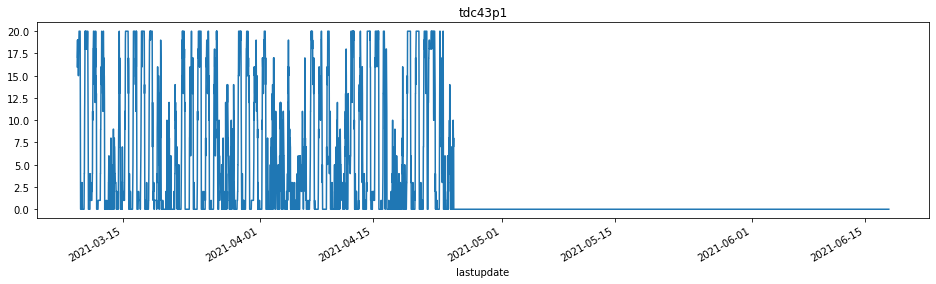

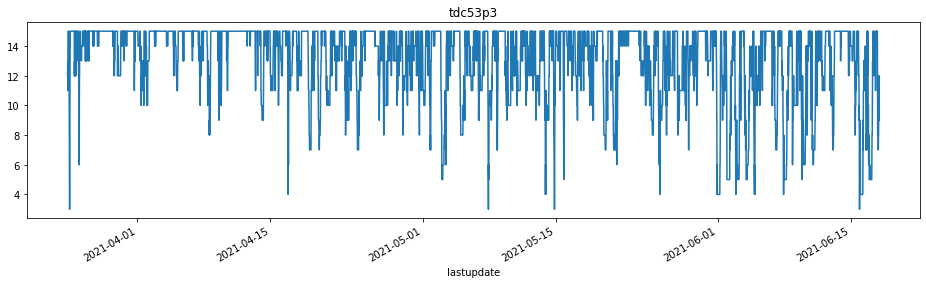

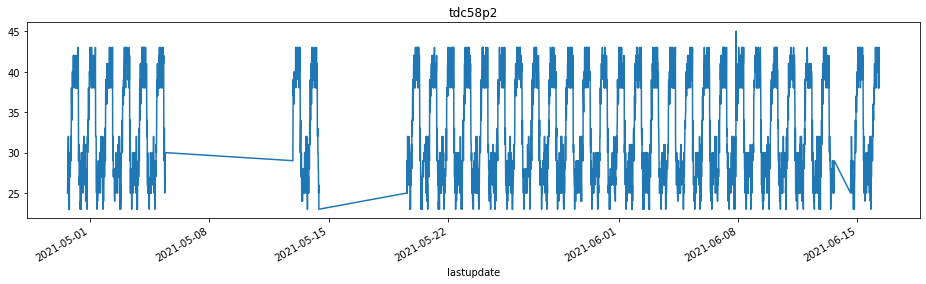

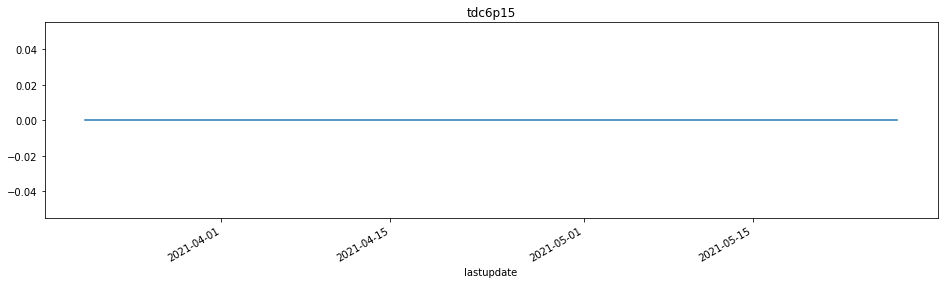

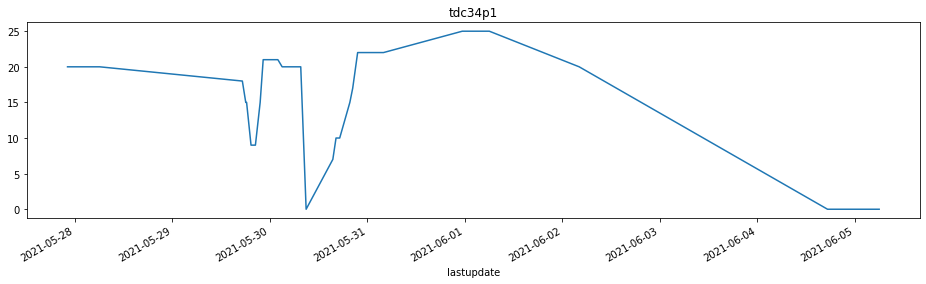

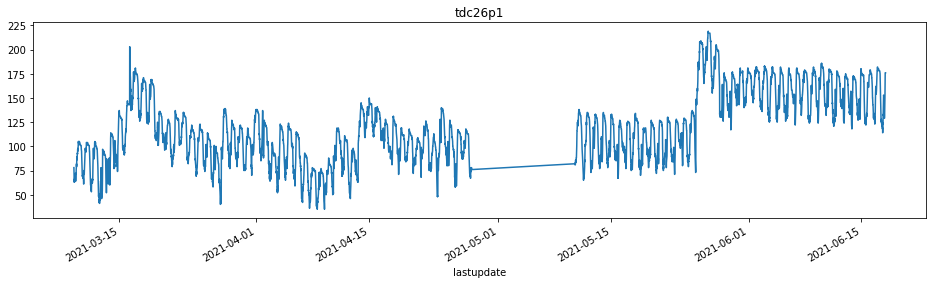

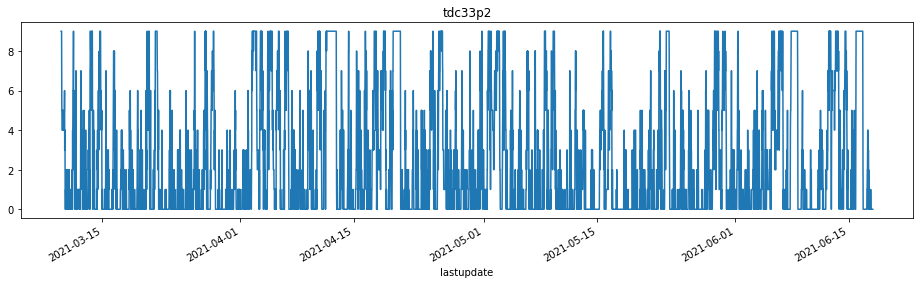

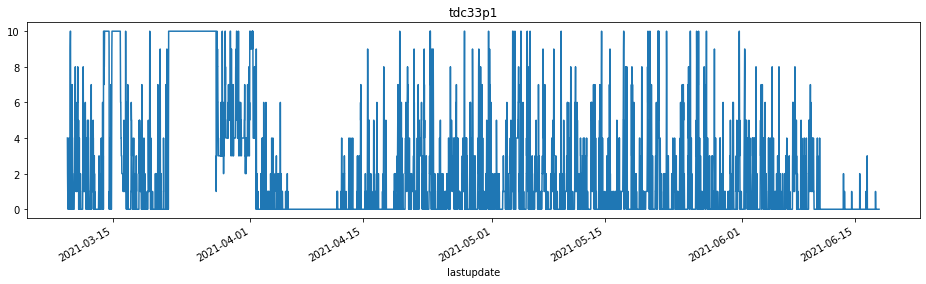

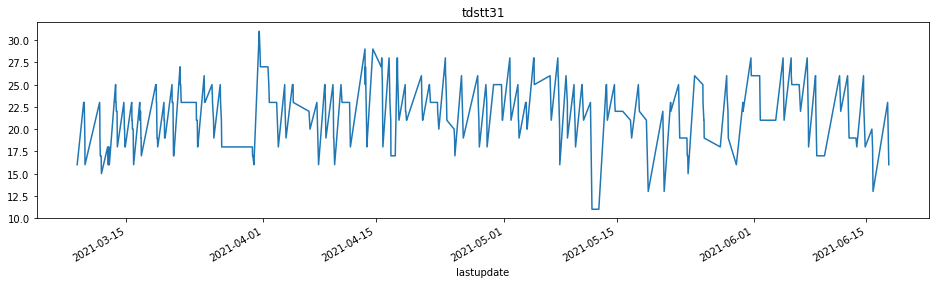

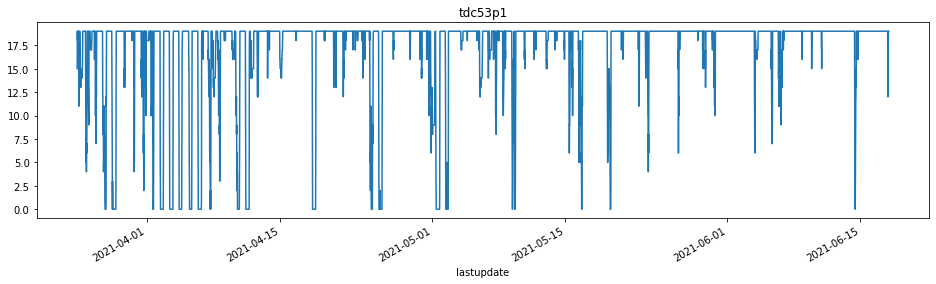

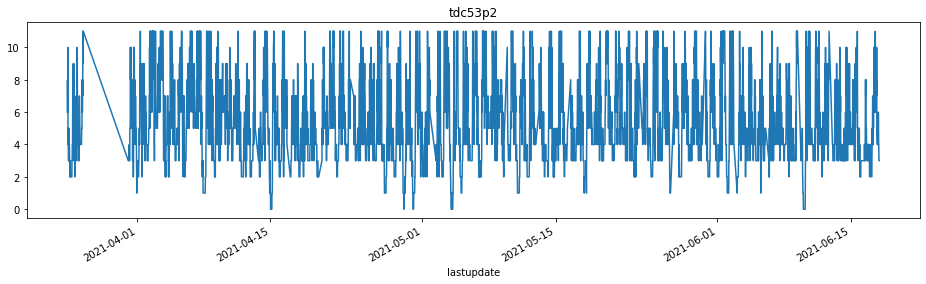

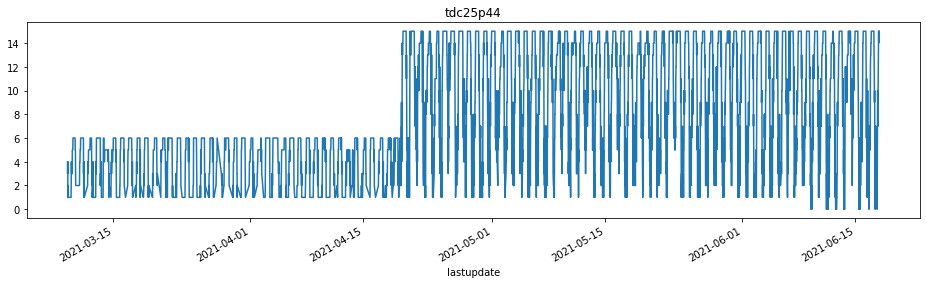

In [ ]:
# visualization

for i, df_park in enumerate(list_df_parks_ready):
  plt.figure(figsize=(16,4))
  df_park['vacancy'].plot()
  plt.title(f'{list_park_id[i]}')
  plt.show()

In [ ]:
# constuct list of X df

list_df_X = []
for df_park in list_df_parks_ready:
  list_df_X.append(df_park[['day_of_week', 'minute', 'hour']])
list_df_X[0]

,day_of_week,minute,hour
lastupdate,,,
2021-06-15 13:57:03,1,57,13
2021-06-15 06:57:02,1,57,6
2021-06-14 21:56:02,0,56,21
2021-06-13 06:42:03,6,42,6
2021-06-12 21:12:03,5,12,21
...,...,...,...
2021-03-09 23:44:01,1,44,23
2021-03-09 20:43:02,1,43,20
2021-03-09 15:57:02,1,57,15


In [ ]:
# constuct list of y

list_y = []
for df_park in list_df_parks_ready:
  list_y.append(df_park['vacancy'])
list_y[0]

lastupdate
2021-06-15 13:57:03     0
2021-06-15 06:57:02     0
2021-06-14 21:56:02     0
2021-06-13 06:42:03     0
2021-06-12 21:12:03     0
                       ..
2021-03-09 23:44:01     1
2021-03-09 20:43:02     0
2021-03-09 15:57:02    20
2021-03-09 12:12:01    17
2021-03-09 08:58:01    16
Name: vacancy, Length: 9633, dtype: int64

In [ ]:
# import libraries for modelling

from sklearn.model_selection import train_test_split

# models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# evaluation
from sklearn.metrics import mean_squared_error

In [ ]:
# split, train, predict data

model_data = pd.DataFrame(columns=['park_id', 'X_train', 'X_test', 'y_train', 'y_test',
                                   'dt_model', 'rf_model', 'dt_pred', 'rf_pred'])

for i, df_park in enumerate(list_df_parks_ready):
  tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(list_df_X[i], list_y[i], 
                                                                      test_size=0.3, random_state=101)

  dt = DecisionTreeRegressor()
  dt.fit(tmp_X_train, tmp_y_train)
  tmp_y_pred_dt = dt.predict(tmp_X_test)

  rf = RandomForestRegressor()
  rf.fit(tmp_X_train, tmp_y_train)
  tmp_y_pred_rf = rf.predict(tmp_X_test)

  model_data = model_data.append({'park_id': list_park_id[i], 
                                    'X_train': tmp_X_train,
                                    'X_test': tmp_X_test,
                                    'y_train': tmp_y_train,
                                    'y_test': tmp_y_test,
                                    'dt_model': dt, 
                                    'rf_model': rf, 
                                    'dt_pred': tmp_y_pred_dt, 
                                    'rf_pred': tmp_y_pred_rf}, 
                                   ignore_index=True)
model_data

,park_id,X_train,X_test,y_train,y_test,dt_model,rf_model,dt_pred,rf_pred
0,tdc43p1,day_of_week minute hour...,day_of_week minute hour...,lastupdate 2021-05-22 23:57:02 0 2021-06-0...,lastupdate 2021-03-14 02:44:01 3 2021-06-04...,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...","(DecisionTreeRegressor(ccp_alpha=0.0, criterio...","[6.0, 7.0, 2.6666666666666665, 2.75, 1.75, 0.6...","[4.065416666666667, 7.567702380952381, 2.66480..."
1,tdc53p3,day_of_week minute hour...,day_of_week minute hour...,lastupdate 2021-04-10 12:57:02 13 2021-05-2...,lastupdate 2021-04-07 04:43:01 15 2021-03-3...,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...","(DecisionTreeRegressor(ccp_alpha=0.0, criterio...","[11.5, 13.0, 14.75, 14.333333333333334, 14.166...","[11.117083333333335, 13.112, 14.78322222222221..."
2,tdc58p2,day_of_week minute hour...,day_of_week minute hour...,lastupdate 2021-05-14 05:42:02 39 2021-05-3...,lastupdate 2021-05-03 06:43:02 41 2021-06-0...,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...","(DecisionTreeRegressor(ccp_alpha=0.0, criterio...","[39.0, 24.0, 24.0, 42.0, 32.0, 41.5, 42.5, 25....","[39.626666666666665, 25.5325, 24.7975, 41.1646..."
3,tdc6p15,day_of_week minute hour...,day_of_week minute hour...,lastupdate 2021-05-04 18:00:45 0 2021-05-04...,lastupdate 2021-05-04 17:05:27 0 2021-03-20...,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...","(DecisionTreeRegressor(ccp_alpha=0.0, criterio...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,tdc34p1,day_of_week minute hour...,day_of_week minute hour...,lastupdate 2021-05-29 22:23:27 21 2021-06-0...,lastupdate 2021-05-31 04:00:30 22 2021-05-2...,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...","(DecisionTreeRegressor(ccp_alpha=0.0, criterio...","[22.0, 20.0, 20.0, 15.0, 9.0, 22.0, 25.0, 0.0,...","[22.0, 19.55, 19.6, 15.03, 9.06, 22.0, 25.0, 0..."
5,tdc26p1,day_of_week minute hour...,day_of_week minute hour...,lastupdate 2021-06-02 21:26:24 170 2021-04-...,lastupdate 2021-04-04 03:12:02 119 2021-04-...,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...","(DecisionTreeRegressor(ccp_alpha=0.0, criterio...","[137.85714285714286, 130.42857142857142, 98.2,...","[137.58179356754354, 130.63262012987016, 98.23..."
6,tdc33p2,day_of_week minute hour...,day_of_week minute hour...,lastupdate 2021-05-27 01:13:04 0 2021-04-03...,lastupdate 2021-03-25 14:27:02 0 2021-04-14...,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...","(DecisionTreeRegressor(ccp_alpha=0.0, criterio...","[0.2, 1.3333333333333333, 0.0, 0.0, 2.75, 7.0,...","[0.5628553391053392, 2.1175119047619044, 1.029..."
7,tdc33p1,day_of_week minute hour...,day_of_week minute hour...,lastupdate 2021-05-13 06:12:02 2 2021-05-2...,lastupdate 2021-05-21 06:43:01 3 2021-05-0...,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...","(DecisionTreeRegressor(ccp_alpha=0.0, criterio...","[1.25, 2.0, 3.4, 1.0, 1.5, 2.0, 2.333333333333...","[1.1323373015873015, 3.518817460317461, 3.5929..."
8,tdstt31,day_of_week minute hour...,day_of_week minute hour...,lastupdate 2021-05-12 17:58:34 11 2021-06-0...,lastupdate 2021-05-22 19:29:48 19 2021-04-0...,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...","(DecisionTreeRegressor(ccp_alpha=0.0, criterio...","[21.107142857142858, 16.0, 22.93076923076923, ...","[21.133052910744123, 16.0, 22.925661839638316,..."
9,tdc53p1,day_of_week minute hour...,day_of_week minute hour...,lastupdate 2021-03-26 12:58:02 19 2021-06-0...,lastupdate 2021-04-01 04:43:02 18 2021-06-1...,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...","(DecisionTreeRegressor(ccp_alpha=0.0, criterio...","[15.666666666666666, 19.0, 19.0, 19.0, 19.0, 1...","[15.609940476190479, 18.723738095238097, 13.66..."


----------------------------------------------------------------------------------------------------
tdc43p1 dt :
RMSE/mean = 6.111456985011004/3.019031141868512 = 202.43%
RMSE/median = 6.111456985011004/0.0 = inf%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


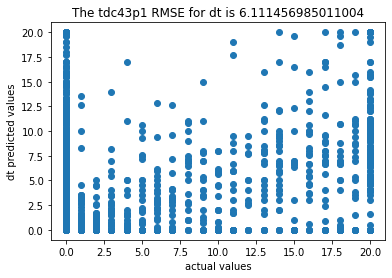

----------------------------------------------------------------------------------------------------
tdc43p1 rf :
RMSE/mean = 5.87696889819332/3.019031141868512 = 194.66%
RMSE/median = 5.87696889819332/0.0 = inf%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


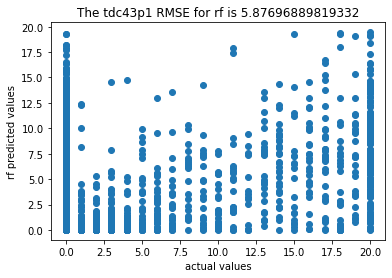

----------------------------------------------------------------------------------------------------
tdc53p3 dt :
RMSE/mean = 2.707075784261686/13.091096455070074 = 20.68%
RMSE/median = 2.707075784261686/14.0 = 19.34%


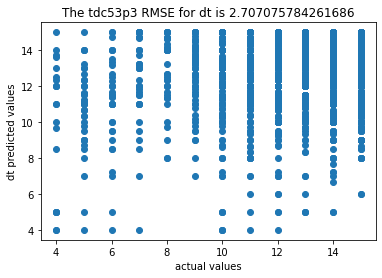

----------------------------------------------------------------------------------------------------
tdc53p3 rf :
RMSE/mean = 2.5479064477920788/13.091096455070074 = 19.46%
RMSE/median = 2.5479064477920788/14.0 = 18.2%


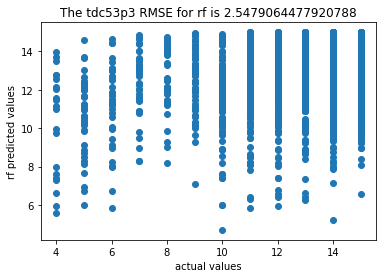

----------------------------------------------------------------------------------------------------
tdc58p2 dt :
RMSE/mean = 2.2520367450674037/32.885714285714286 = 6.85%
RMSE/median = 2.2520367450674037/31.0 = 7.26%


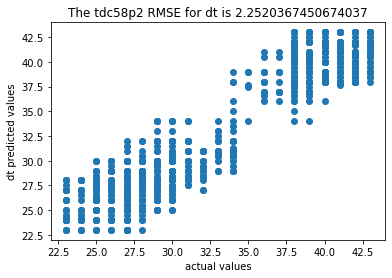

----------------------------------------------------------------------------------------------------
tdc58p2 rf :
RMSE/mean = 1.9145160308189093/32.885714285714286 = 5.82%
RMSE/median = 1.9145160308189093/31.0 = 6.18%


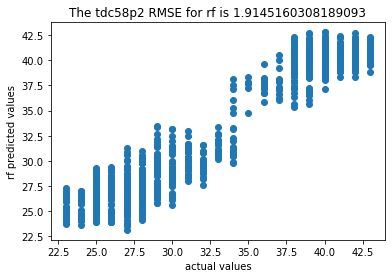

----------------------------------------------------------------------------------------------------
tdc6p15 dt :
RMSE/mean = 0.0/0.0 = nan%
RMSE/median = 0.0/0.0 = nan%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


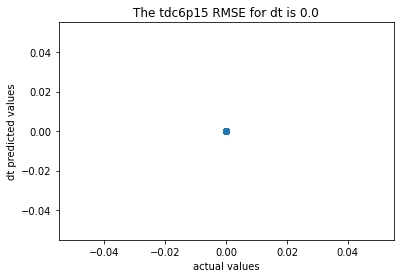

----------------------------------------------------------------------------------------------------
tdc6p15 rf :
RMSE/mean = 0.0/0.0 = nan%
RMSE/median = 0.0/0.0 = nan%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


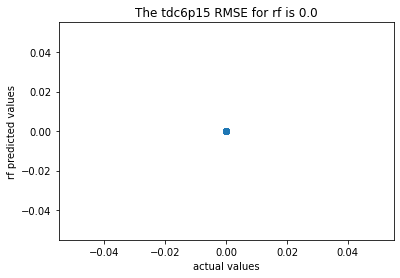

----------------------------------------------------------------------------------------------------
tdc34p1 dt :
RMSE/mean = 0.0/15.376623376623376 = 0.0%
RMSE/median = 0.0/20.0 = 0.0%


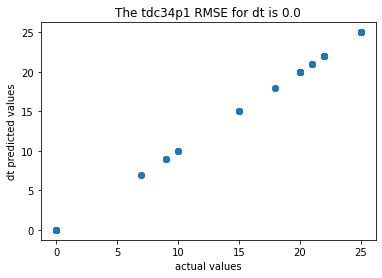

----------------------------------------------------------------------------------------------------
tdc34p1 rf :
RMSE/mean = 0.7208859988768149/15.376623376623376 = 4.69%
RMSE/median = 0.7208859988768149/20.0 = 3.6%


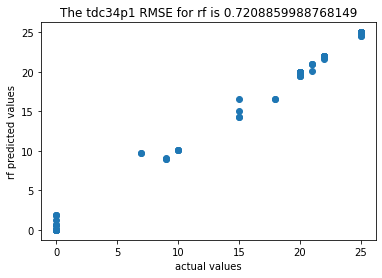

----------------------------------------------------------------------------------------------------
tdc26p1 dt :
RMSE/mean = 35.02031594967666/116.9802371541502 = 29.94%
RMSE/median = 35.02031594967666/114.0 = 30.72%


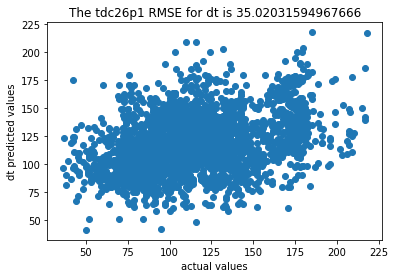

----------------------------------------------------------------------------------------------------
tdc26p1 rf :
RMSE/mean = 33.30625401938685/116.9802371541502 = 28.47%
RMSE/median = 33.30625401938685/114.0 = 29.22%


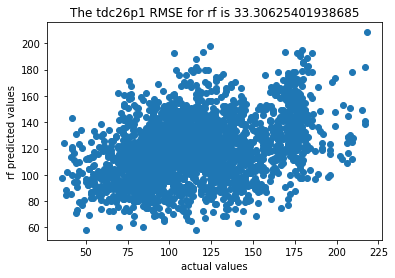

----------------------------------------------------------------------------------------------------
tdc33p2 dt :
RMSE/mean = 2.7175480100941116/2.2957252978276106 = 118.37%
RMSE/median = 2.7175480100941116/1.0 = 271.75%


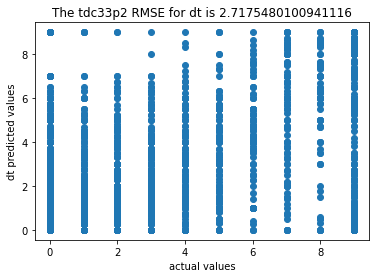

----------------------------------------------------------------------------------------------------
tdc33p2 rf :
RMSE/mean = 2.570974538979475/2.2957252978276106 = 111.99%
RMSE/median = 2.570974538979475/1.0 = 257.1%


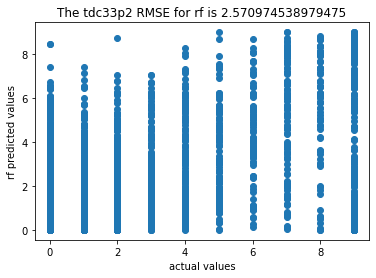

----------------------------------------------------------------------------------------------------
tdc33p1 dt :
RMSE/mean = 3.5455810048129344/1.8288288288288288 = 193.87%
RMSE/median = 3.5455810048129344/0.0 = inf%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


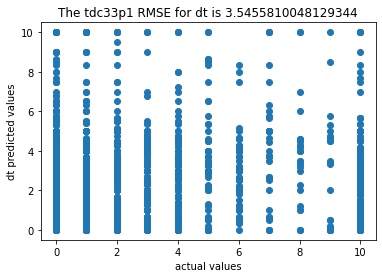

----------------------------------------------------------------------------------------------------
tdc33p1 rf :
RMSE/mean = 3.3396562338232565/1.8288288288288288 = 182.61%
RMSE/median = 3.3396562338232565/0.0 = inf%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


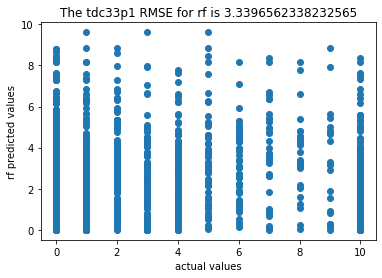

----------------------------------------------------------------------------------------------------
tdstt31 dt :
RMSE/mean = 0.8355172571603916/19.88198757763975 = 4.2%
RMSE/median = 0.8355172571603916/19.0 = 4.4%


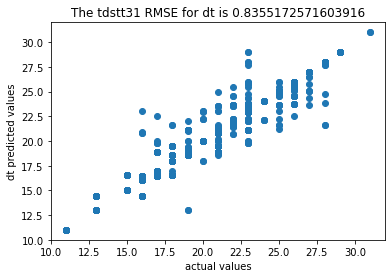

----------------------------------------------------------------------------------------------------
tdstt31 rf :
RMSE/mean = 0.8162106511246833/19.88198757763975 = 4.11%
RMSE/median = 0.8162106511246833/19.0 = 4.3%


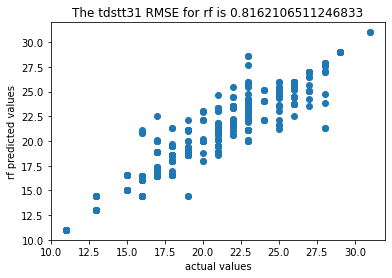

----------------------------------------------------------------------------------------------------
tdc53p1 dt :
RMSE/mean = 4.579590208932574/17.127511275112752 = 26.74%
RMSE/median = 4.579590208932574/19.0 = 24.1%


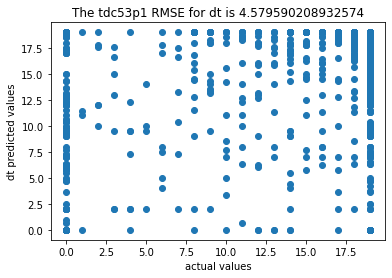

----------------------------------------------------------------------------------------------------
tdc53p1 rf :
RMSE/mean = 4.33051541519131/17.127511275112752 = 25.28%
RMSE/median = 4.33051541519131/19.0 = 22.79%


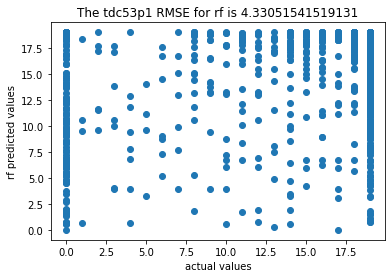

----------------------------------------------------------------------------------------------------
tdc53p2 dt :
RMSE/mean = 2.3005423329842594/5.343866171003717 = 43.05%
RMSE/median = 2.3005423329842594/5.0 = 46.01%


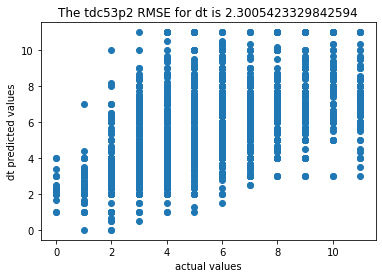

----------------------------------------------------------------------------------------------------
tdc53p2 rf :
RMSE/mean = 2.1113689182049136/5.343866171003717 = 39.51%
RMSE/median = 2.1113689182049136/5.0 = 42.23%


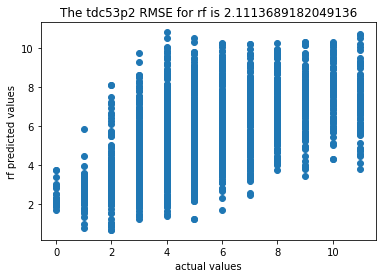

----------------------------------------------------------------------------------------------------
tdc25p44 dt :
RMSE/mean = 4.577081866468474/8.487086359967716 = 53.93%
RMSE/median = 4.577081866468474/6.0 = 76.28%


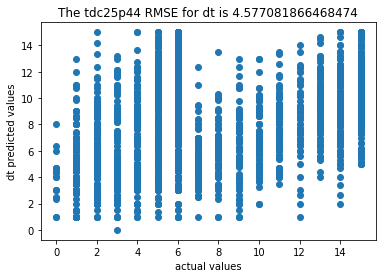

----------------------------------------------------------------------------------------------------
tdc25p44 rf :
RMSE/mean = 4.457257894647204/8.487086359967716 = 52.52%
RMSE/median = 4.457257894647204/6.0 = 74.29%


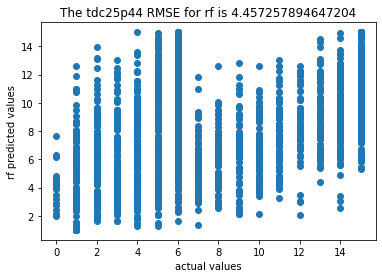

In [ ]:
# visualization

model_names = ['dt', 'rf']

for i, data in model_data.iterrows():
  predictions = []
  predictions.append(data['dt_pred'])
  predictions.append(data['rf_pred'])

  plt.figure(figsize=(6,4))

  for j, (model_name, y_pred) in enumerate(zip(model_names, predictions)):

    park_id = data['park_id']
    mse = mean_squared_error(data['y_test'], y_pred)
    fig = plt.scatter(data['y_test'], y_pred)
    plt.xlabel('actual values')
    plt.ylabel(f'{model_name} predicted values')
    mean = data['y_test'].mean()
    median = data['y_test'].median()
    rmse = np.sqrt(mse)
    plt.title(f'The {park_id} RMSE for {model_name} is {rmse}')
    print('-'*100)
    print(f'{park_id} {model_name} :')
    print(f'RMSE/mean = {rmse}/{mean} = {round(100*rmse/mean, 2)}%\nRMSE/median = {rmse}/{median} = {round(100*rmse/median, 2)}%')
    plt.show()

In [ ]:
# for developer

dev_date = pd.to_datetime('2021-07-02 09:25:30')
dev_date = dev_date.round('15T')
dev_date

Timestamp('2021-07-02 09:30:00')

In [ ]:
# for developer

dev_d_date = {}
dev_d_date['day_of_week'] = dev_date.dayofweek
dev_d_date['minute'] = dev_date.minute
dev_d_date['hour'] = dev_date.hour
dev_df_date = pd.DataFrame([dev_d_date])
dev_df_date

,day_of_week,minute,hour
0,4,30,9


In [ ]:
# for developer

model_result = pd.DataFrame(columns=['park_id', 'predicted_vacancy'])

for i, data in model_data.iterrows():
  dev_result = round(data['rf_model'].predict(dev_df_date)[0])
  model_result = model_result.append({'park_id':data['park_id'], 'predicted_vacancy':dev_result}, ignore_index=True)
model_result = model_result.sort_values('predicted_vacancy', ascending=False)
model_result = model_result.reset_index(drop=True)
model_result

,park_id,predicted_vacancy
0,tdc26p1,96
1,tdc58p2,27
2,tdc34p1,20
3,tdc53p1,19
4,tdstt31,17
5,tdc53p3,14
6,tdc25p44,11
7,tdc53p2,7
8,tdc33p2,3
9,tdc43p1,2


In [ ]:
# for developer

model_result.merge(df_basic, how='inner', on='park_id')

,park_id,predicted_vacancy,name_en,name_tc,name_sc,displayAddress_en,displayAddress_tc,displayAddress_sc,district_en,district_tc,district_sc
0,tdc26p1,96,No.1 Lei Yue Mun Path Public Carpark,鯉魚門徑1號公眾停車場,鲤鱼门径1号公众停车场,"No.1 Lei Yue Mun Path, Yau Tong, Kowloon",九龍油塘鯉魚門徑1號,九龙油塘鲤鱼门径1号,Kwun Tong,觀塘區,观塘区
1,tdc58p2,27,Lei Yue Mun Municipal Services Building,鯉魚門市政大廈,鲤鱼门市政大厦,"6 Lei Yue Mun Path, Yau Tong",油塘鯉魚門徑6號,油塘鲤鱼门径6号,Kwun Tong,觀塘區,观塘区
2,tdc34p1,20,On Tat Estate Car park,安達邨停車場,安达邨停车场,"3, On Chui Street, Kwun Tong",觀塘安翠街3號,观塘安翠街3号,Kwun Tong,觀塘區,观塘区
3,tdc53p1,19,Jordan Valley Park,佐敦谷公園,佐敦谷公园,"No. 71, New Clear Water Bay Road, Kwun Tong, K...",九龍觀塘區四順新清水灣道71號,九龙观塘区四顺新清水湾道71号,Kwun Tong,觀塘區,观塘区
4,tdstt31,17,Choi Hing Road,彩興路,彩兴路,"Choi Hing Road, Jordan Valley, Kowloon",九龍佐敦谷彩興路,九龙佐敦谷彩兴路,Kwun Tong,觀塘區,观塘区
5,tdc53p3,14,Hong Ning Road Park,康寧道公園,康宁道公园,Junction between Hong Ning Road and Wo Hong Pa...,九龍觀塘康寧道和康徑交界,九龙观塘康宁道和康径交界,Kwun Tong,觀塘區,观塘区
6,tdc25p44,11,Hewlett Centre,豐利中心,丰利中心,"54 Hoi Yuen Road, Kwun Tong, Kowloon",九龍觀塘開源道54號,九龙观塘开源道54号,Kwun Tong,觀塘區,观塘区
7,tdc53p2,7,Jordan Valley Swimming Pool,佐敦谷游泳池,佐敦谷游泳池,"6 Choi Ha Rd, Ngau Tau Kok","6 彩霞道, 牛頭角","6 彩霞道, 牛头角",Kwun Tong,觀塘區,观塘区
8,tdc33p2,3,Jordan Valley Playground,佐敦谷公園遊樂場停車場,佐敦谷公园游乐场停车场,"Choi Ha Road, Ngau Tau Kok, Kowloon",彩霞道18號,彩霞道18号,Kwun Tong,觀塘區,观塘区
9,tdc43p1,2,Shun Lee Tsuen Park,順利邨公園,顺利邨公园,Shun Lee Tsuen Park,順利邨公園,顺利邨公园,Kwun Tong,觀塘區,观塘区


# 1.2 Advanced Problem: Solution Function


In [ ]:
# this is a function for predicting vacancies of parks in a desired district using Random Forest

df_basic = pd.read_csv('./data/park_basic_info.csv')

print(df_basic['district_en'].unique(), end='\n\n')
district = input('District in English: ')   # [Advance]

list_park_id = list(df_basic[df_basic['district_en'] == district]['park_id'])
df_park_paths = './DTT_BootCamp2021_MiniProject/parks_csv/' + pd.DataFrame(list_park_id) + '.csv'
list_park_paths = df_park_paths.iloc[:, 0].tolist()

list_df_parks = []
try:
  for path in list_park_paths:
    list_df_parks.append(pd.read_csv(path))
except:
  pass

list_park_id = []
for df_park in list_df_parks:
  list_park_id.append(df_park['park_id'][0])

list_df_parks_cleaned = []
for df_park in list_df_parks:
  tmp_df_park = df_park
  tmp_df_park = tmp_df_park[tmp_df_park['type']=='P']
  tmp_df_park = tmp_df_park[tmp_df_park['vacancy_type']=='A']

  if tmp_df_park['type'].nunique() > 1: raise Warning('more than one vehicle type')   # for developer
  if tmp_df_park['vacancy_type'].nunique() > 1: raise Warning('more than one vacancy type')   # for developer

  if len(tmp_df_park) == 0: continue

  tmp_df_park = tmp_df_park.drop(['category', 'vacancy_type', 'type', 'rounded_time'], axis='columns')

  tmp_df_park['vacancy'] = tmp_df_park['vacancy'].astype(int)
  tmp_df_park['lastupdate'] = pd.to_datetime(tmp_df_park['lastupdate'])

  tmp_df_park['day_of_week'] = tmp_df_park['lastupdate'].apply(lambda x: x.dayofweek)
  tmp_df_park['minute'] = tmp_df_park['lastupdate'].apply(lambda x: x.minute)
  tmp_df_park['hour'] = tmp_df_park['lastupdate'].apply(lambda x: x.hour)

  list_df_parks_cleaned.append(tmp_df_park)

if len(list_df_parks_cleaned) == 0: raise Warning('No suitable cark park in the district, pls choose another district')

list_df_parks_ready = []
for df_park in list_df_parks_cleaned:
  tmp_df_park = df_park
  tmp_df_park = tmp_df_park.drop('park_id', axis='columns')
  tmp_df_park = tmp_df_park.set_index('lastupdate')
  list_df_parks_ready.append(tmp_df_park)

list_df_X = []
for df_park in list_df_parks_ready:
  list_df_X.append(df_park[['day_of_week', 'minute','hour']])

list_y = []
for df_park in list_df_parks_ready:
  list_y.append(df_park['vacancy'])

model_data = pd.DataFrame(columns=['park_id', 'X_train', 'X_test', 'y_train', 'y_test',
                                   'dt_model', 'rf_model', 'dt_pred', 'rf_pred'])

from sklearn.model_selection import train_test_split

# models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# evaluation
from sklearn.metrics import mean_squared_error

for i, df_park in enumerate(list_df_parks_ready):
  tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(list_df_X[i], list_y[i], 
                                                                      test_size=0.3, random_state=101)

  dt = DecisionTreeRegressor()
  dt.fit(tmp_X_train, tmp_y_train)
  tmp_y_pred_dt = dt.predict(tmp_X_test)

  rf = RandomForestRegressor()
  rf.fit(tmp_X_train, tmp_y_train)
  tmp_y_pred_rf = rf.predict(tmp_X_test)

  model_data = model_data.append({'park_id': list_park_id[i], 
                                    'X_train': tmp_X_train,
                                    'X_test': tmp_X_test,
                                    'y_train': tmp_y_train,
                                    'y_test': tmp_y_test,
                                    'dt_model': dt, 
                                    'rf_model': rf, 
                                    'dt_pred': tmp_y_pred_dt, 
                                    'rf_pred': tmp_y_pred_rf}, 
                                   ignore_index=True)

print(f'\n' + '-'*100)
print(f'\n(valid formate: 2021-07-02 09:25:30)\n')
input_str = input('Predicting Time (YYYY-MM-DD hr:min:sec): ')
time = pd.to_datetime(input_str)
time = time.round('15T')

d_time = {}
d_time['day_of_week'] = time.dayofweek
d_time['minute'] = time.minute
d_time['hour'] = time.hour
df_time = pd.DataFrame([d_time])

model_result = pd.DataFrame(columns=['park_id', 'predicted_vacancy'])

for i, data in model_data.iterrows():
  result = round(data['rf_model'].predict(df_time)[0])
  model_result = model_result.append({'park_id':data['park_id'], 'predicted_vacancy':result}, ignore_index=True)

import IPython.display as display

display.clear_output()
print('-'*100)
print(f'The Predicted Vacancy of Parks in District [{district}] at around [{time}]')
print('-'*100)
model_result = model_result.merge(df_basic, how='inner', on='park_id')
model_result = model_result.sort_values('predicted_vacancy', ascending=False)
model_result = model_result.reset_index(drop=True)
model_result

----------------------------------------------------------------------------------------------------
The Predicted Vacancy of Parks in District [Yau Tsim Mong] at around [2021-07-02 09:30:00]
----------------------------------------------------------------------------------------------------


,park_id,predicted_vacancy,name_en,name_tc,name_sc,displayAddress_en,displayAddress_tc,displayAddress_sc,district_en,district_tc,district_sc
0,tdc8p10,641,ELEMENTS Carpark,圓方停車場,圆方停车场,"1 AUSTIN ROAD WEST, Yau Tsim Mong District, Ko...",九龍 油尖旺區 柯士甸道西1號,九龙 油尖旺区 柯士甸道西1号,Yau Tsim Mong,油尖旺區,油尖旺区
1,tdc17p1,119,WKCD Xiqu Centre Car Park,西九文化區戲曲中心停車場,西九文化区戏曲中心停车场,"88 Austin Road West, Tsim Sha Tsui, Kowloon",九龍尖沙咀柯士甸道西88號,九龙尖沙咀柯士甸道西88号,Yau Tsim Mong,油尖旺區,油尖旺区
2,tdstt30,55,Hoi Ting Road,海庭道,海庭道,"Hoi Ting Road, Yau Ma Tei, Kowloon",九龍油麻地海庭道,九龙油麻地海庭道,Yau Tsim Mong,油尖旺區,油尖旺区
3,tdc14p8428,48,Hoi Fu Car Park,海富停車場,海富停车场,"Hoi Fu Shopping Centre, 2 Hoi Ting Road, Mong ...",九龍旺角海庭路2號海富商場,九龙旺角海庭路2号海富商场,Yau Tsim Mong,油尖旺區,油尖旺区
4,tdc57p1,44,West Kowloon Government Offices,西九龍政府合署,西九龙政府合署,"No. 11 Hoi Ting Road, Yau Ma Tei, Kowloon",香港九龍油麻地海庭道11號,香港九龙油麻地海庭道11号,Yau Tsim Mong,油尖旺區,油尖旺区
5,tdc17p3,42,PSO Car Park,項目辦公室停車場,项目办公室停车场,"Project Site Office, WKCD, Kowloon, Hong Kong",香港九龍西九文化區項目辦公室,香港九龙西九文化区项目办公室,Yau Tsim Mong,油尖旺區,油尖旺区
6,tdc17p2,18,Zone E Car Park,E區停車場,E区停车场,"West Kowloon Cultural District, No.36 Museum D...",香港九龍西九文化區博物館路36號,香港九龙西九文化区博物馆路36号,Yau Tsim Mong,油尖旺區,油尖旺区
7,tdstt19,10,Junction of Hoi Wang Road and Lai Cheung Road,海泓道麗翔道交界,海泓道丽翔道交界,Junction of Hoi Wang Road and Lai Cheung Road,海泓道麗翔道交界,海泓道丽翔道交界,Yau Tsim Mong,油尖旺區,油尖旺区
8,tdc8p2,5,MTR Kowloon Station Car Park,港鐵九龍站停車場,港铁九龙站停车场,"AUSTIN ROAD WEST, Yau Tsim Mong District, Kow...",九龍 油尖旺區 柯士甸道西號,九龙 油尖旺区 柯士甸道西号,Yau Tsim Mong,油尖旺區,油尖旺区
9,tdc26p2,2,Pioneer Centre Car Park,始創中心停車場,始创中心停车场,NO.133 Sai Yeung Choi Street South,西洋菜南街133號,西洋菜南街133号,Yau Tsim Mong,油尖旺區,油尖旺区
